# K-Nearest Neighbours

### Task 1
Draw a graph that shows the distribution of the various labels across the entire dataset.

In [70]:
# importing libraries

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import LabelEncoder

In [71]:
# loading dataset and extracting features

dataset=np.load('data.npy', allow_pickle=True)
# print(dataset)

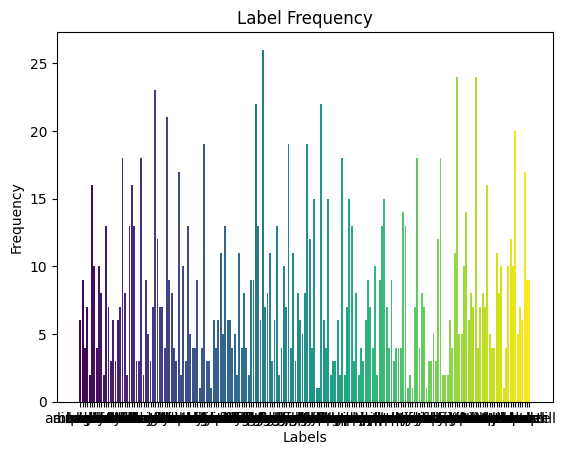

In [72]:
# trying to graphically represent the labels

# retrieve the labels
labels=dataset[:,3]

# Calculate the frequency of each label
unique_labels, label_counts = np.unique(labels, return_counts=True)

# Generate different colors for each label
colors = plt.cm.viridis(np.linspace(0, 1, len(unique_labels)))

# Plot the bar graph with different colors for each bar
plt.bar(unique_labels, label_counts, color=colors)

# Add labels and title
plt.xlabel('Labels')
plt.ylabel('Frequency')
plt.title('Label Frequency')

plt.savefig('label_freq_graph.png')

# Show the plot
plt.show()

### Task 2
Create a KNN class where you implement the following:
1. Create a class where you can modify and access the encoder type, k, and
distance metric (and any required parameter)of the class
2. Return the inference (prediction) when given the above parameters (encoder type, k, and distance metric).
3. Return the validation f-1 score, accuracy, precision, and recall after splitting the provided dataset into train and val subsets. You are allowed to
use sklearn metrics for this part.

In [73]:
# splitting the dataset for training and testing

np.random.shuffle(dataset)
train_data, test_data = np.split(dataset, [1200])

# test_data.shape
# test_data

In [74]:
# retrieving the specific columns for the training and testing data

resnet_train=train_data[:,1]
resnet_test=test_data[:,1]

vit_train=train_data[:,2]
vit_test=test_data[:,2]

labels_train=train_data[:,3]
labels_test=test_data[:,3]

# df=pd.DataFrame(resnet_test[0])
# df

In [75]:
# trying knn for euclidian dist and resnet val

def euclidian_dist(testdp, traindp):
    sub=testdp-traindp
    subsq=np.square(sub)
    subsqsum=np.sum(subsq)
    dist=np.sqrt(subsqsum)
    return dist

k=5
pred_labels=[]
for dptest in resnet_test:
    
    distances={}
    index=0
    for dptrain in resnet_train:
        dist=euclidian_dist(dptest, dptrain)
        distances[index]=dist
        index+=1
        # print(dist)
    # print(distances)
    sorted_distances=sorted(distances.items(), key=lambda x: x[1])
    # print(sorted_distances)
    
    k_nearest_labels={}
    maxfreq=0
    maxfreqlabels=[]
    for i in range(k):
        curr_label=labels_train[sorted_distances[i][0]]
        k_nearest_labels[curr_label]=k_nearest_labels.get(labels_train[sorted_distances[i][0]], 0)+1
    # print(k_nearest_labels)
    for l, c in k_nearest_labels.items():
        if c>maxfreq:
            maxfreq=c
            pred_label=l
    pred_labels.append(pred_label)
print("Predicted labels:")
print(pred_labels)
print("Actual labels:")
print(labels_test.tolist())

correct = 0

for i in range(len(pred_labels)):
    if pred_labels[i] == labels_test[i]:
        correct += 1

accuracy = correct / len(labels_test)
# print(accuracy)
print(f"Accuracy: {accuracy * 100:.2f}%")



Predicted labels:
['bicycle', 'tomato', 'needle', 'sun', 'sun', 'walk', 'pencil', 'cigarette', 'sun', 'van', 'finger', 'clock', 'chair', 'fish', 'hammer', 'knife', 'airplane', 'dragonfly', 'fish', 'tent', 'radio', 'dragonfly', 'keyboard', 'fish', 'swim', 'sun', 'telephone', 'clock', 'monkey', 'hammer', 'needle', 'climb', 'hammer', 'love', 'camera', 'spoon', 'chair', 'key', 'boat', 'tomato', 'sun', 'tree', 'bed', 'hammer', 'chair', 'bird', 'bucket', 'candle', 'clean', 'mug', 'mouse', 'ant', 'loudspeaker', 'chair', 'key', 'postcard', 'fish', 'sleep', 'sun', 'swim', 'fish', 'hammer', 'finger', 'laptop', 'clean', 'finger', 'butterfly', 'ladder', 'frog', 'candle', 'elephant', 'walk', 'passport', 'tree', 'pizza', 'keyboard', 'roof', 'cut', 'finger', 'flute', 'arrow', 'chair', 'lazy', 'candle', 'potato', 'chair', 'tree', 'arrow', 'fly', 'table', 'potato', 'shark', 'knife', 'frog', 'candle', 'keyboard', 'fish', 'fish', 'flute', 'grass', 'clean', 'bend', 'selfie', 'camera', 'chair', 'tree', 'ca